<a href="https://colab.research.google.com/github/wafaaskia/Tugas/blob/main/Wafa_Askia_Fitriani_DS_A_Tugas_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@created by: Wafa Askia Fitriani

#Background

**Deskripsi:**

Kumpulan data ini digunakan untuk memprediksi efektivitas buruh. Karena sebagian besar proses pada pabriknya masih dilakukan secara manual, maka penting baginya untuk mengetahui seberapa efektif dan efisien kinerja buruhnya sehingga dia bisa melakukan intervensi tertentu jika efektivitas kinerjanya mulai turun dan memberikan insentif jika kinerjanya baik dan stabil.

**Informasi Variable**:
1. date : tanggal
2. day : hari
3. quarter : kuartal
4. department : nama departemen
5. team_no : Nomor tim
6. no_of_workers : Jumlah pekerja dari tiap tim
7. no_of_style_change : Jumlah perubahan pada desain pada produk tertentu
8. targeted_productivity : Target produktivitas yang diatur oleh manager untuk tiap tim setiap harinya.
9. smv : Standard Minute Value, banyaknya waktu yang dialokasikan untuk mengerjakan tugas
10. wip : Work in progress. Yaitu jumlah barang atau produk yang belum selesai diproduksi
11. over_time : Banyakan waktu tambahan dari tiap tim dihitung dalam menit
12. incentive : Merepresentasikan insentif (dalam BDT) yang diberikan kepada buruh untuk memotivasi buruh
13. idle_time : Waktu idle yang terjadi karena adanya gangguan pada proses produksi disebabkan oleh
berbagai macam sebab
14. idle_men : Jumlah pekerja yang idle disebabkan adanya interupsi atau gangguan pada proses produksi
15. actual_productivity : % produktivitas buruh. Memiliki rentang nilai 0-1


**Informasi Dataset:**
* Data dapat dilihat di link berikut : [link](https://drive.google.com/drive/folders/13M0Z9Zzz_NJGrYrUD4qWVRxim2f_OTZ8)




# Data Loading

In [1]:
#@title Import Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error

In [2]:
#@title Load Data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MBKM/Tugas Akhir/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Data Understanding

In [4]:
df.shape

(1197, 15)

In [5]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


# Data Cleaning

In [8]:
#@title Duplicate dataframe

df_copy = df.copy()
df_copy.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
#@title Deteksi Missing Value

df_copy.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

terdapat 506 missing value pada kolom wip

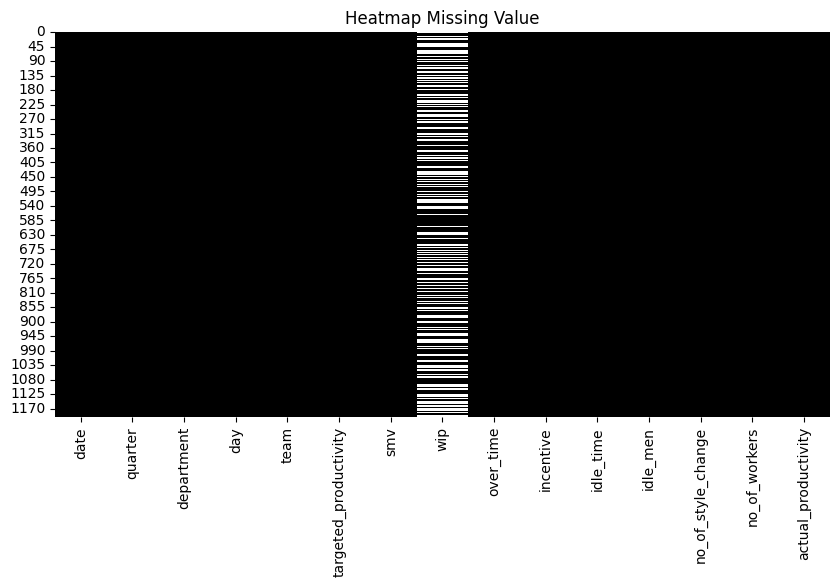

In [10]:
#Visualisasikan missing value dengan heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_copy.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()

In [11]:
#mengecek presentase missing value wip
missing_values_count = df_copy['wip'].isnull().sum()
total_values = len(df_copy['wip'])
missing_percentage = (missing_values_count / total_values) * 100

print(f"Presentase missing values pada kolom wip: {missing_percentage} %")

Presentase missing values pada kolom wip: 42.272347535505425 %


In [12]:
#@title Handling Missing Value

#mengisi missing value wip dengan mean
df_copy['wip'] = df_copy['wip'].fillna(df_copy['wip'].mean())

In [13]:
df_copy.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

semua kolom sudah bersih dari missing value

In [14]:
#@title Check Duplicate Data

df_copy.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1192    False
1193    False
1194    False
1195    False
1196    False
Length: 1197, dtype: bool

In [15]:
df_copy.duplicated().sum()

0

##Hitung Persentase Outlier

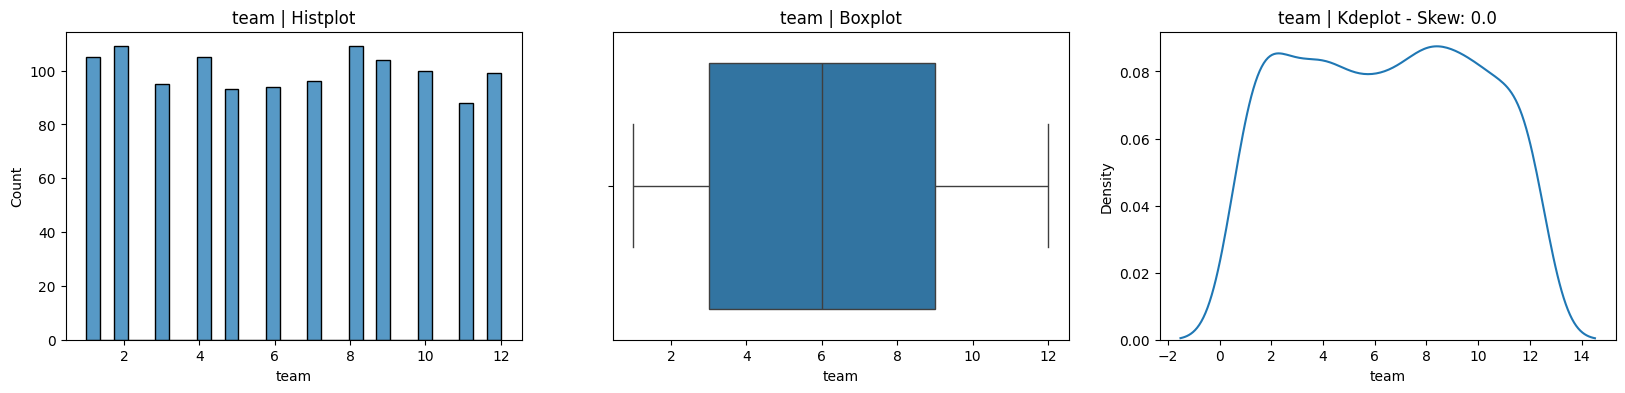

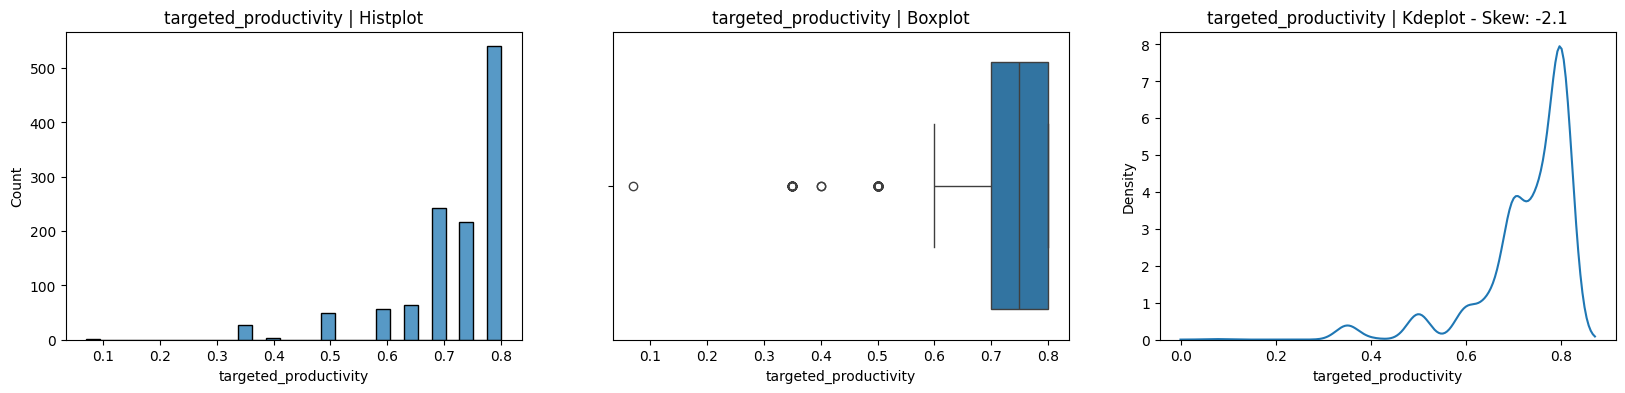

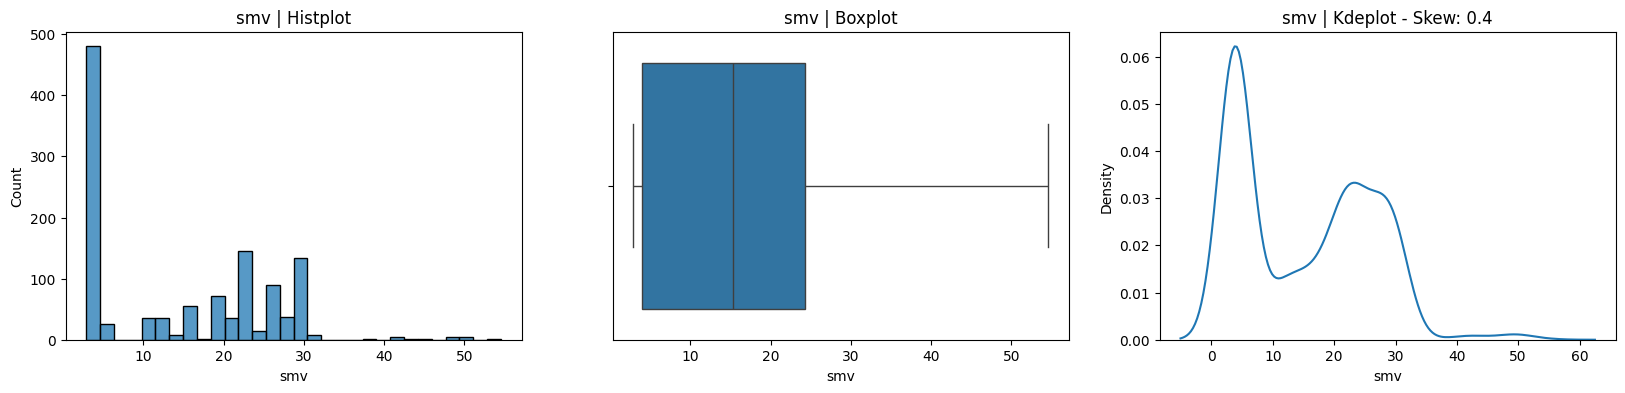

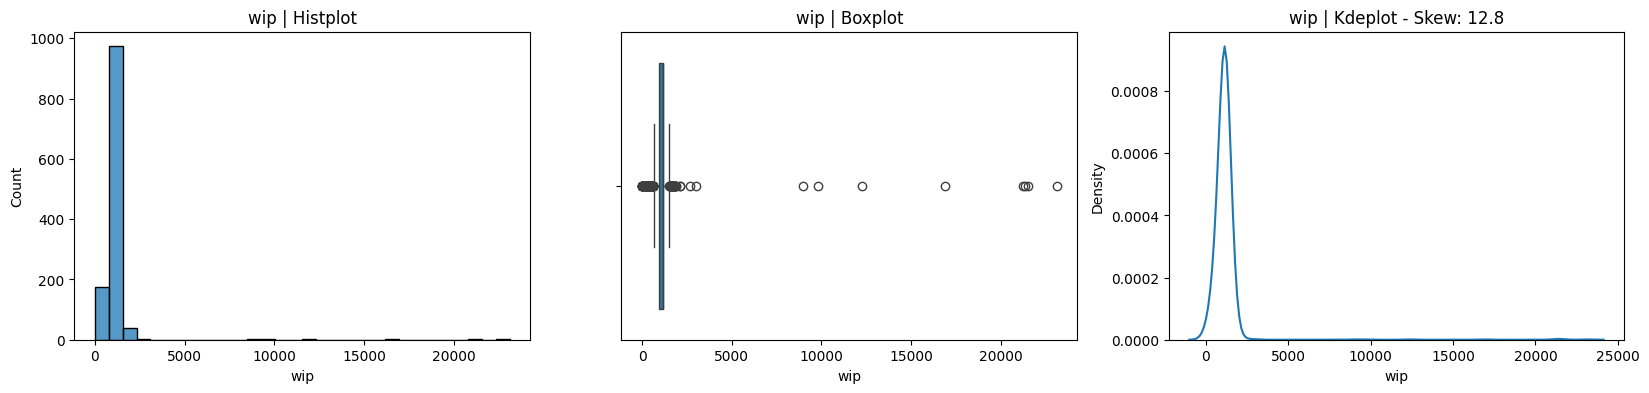

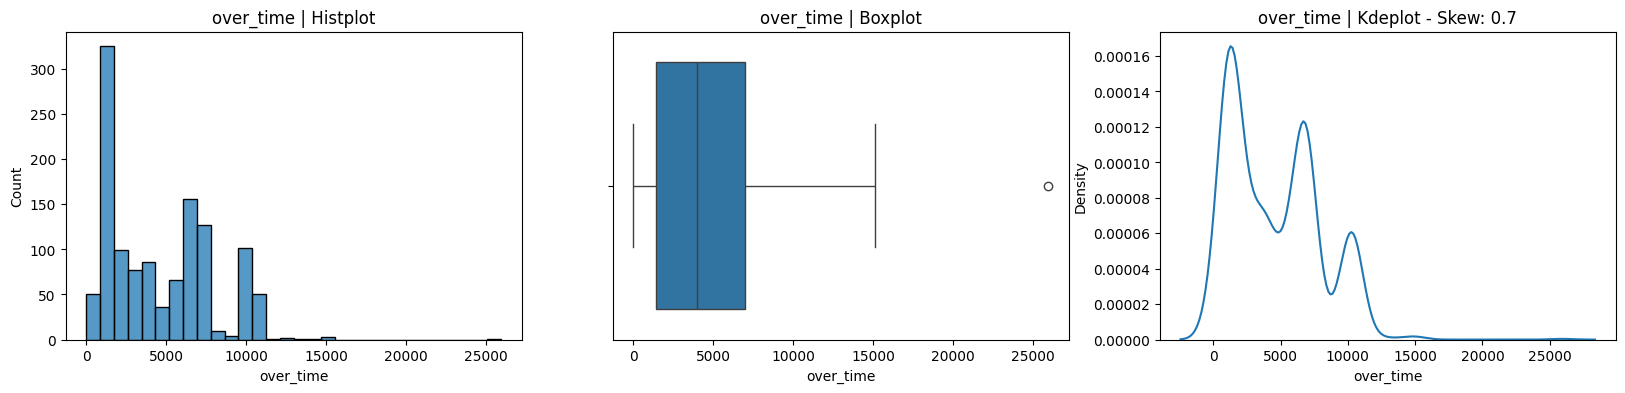

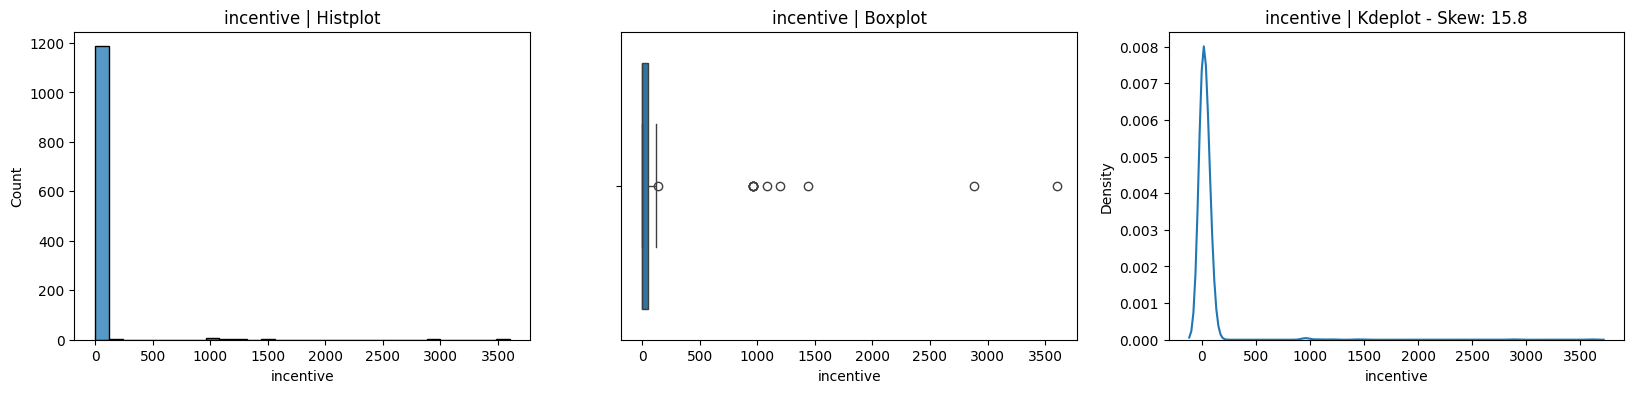

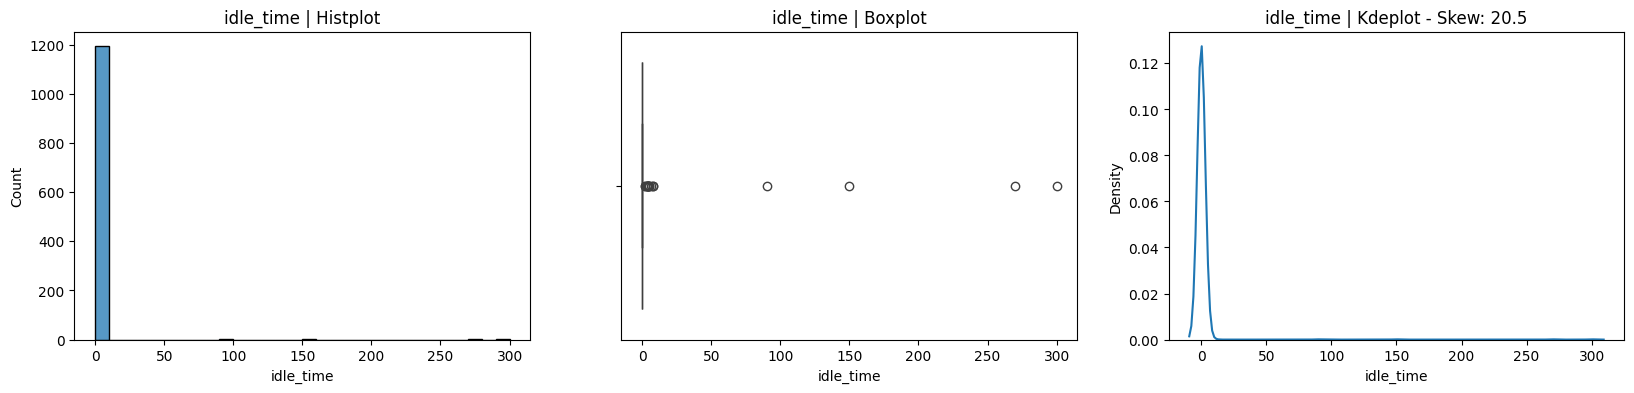

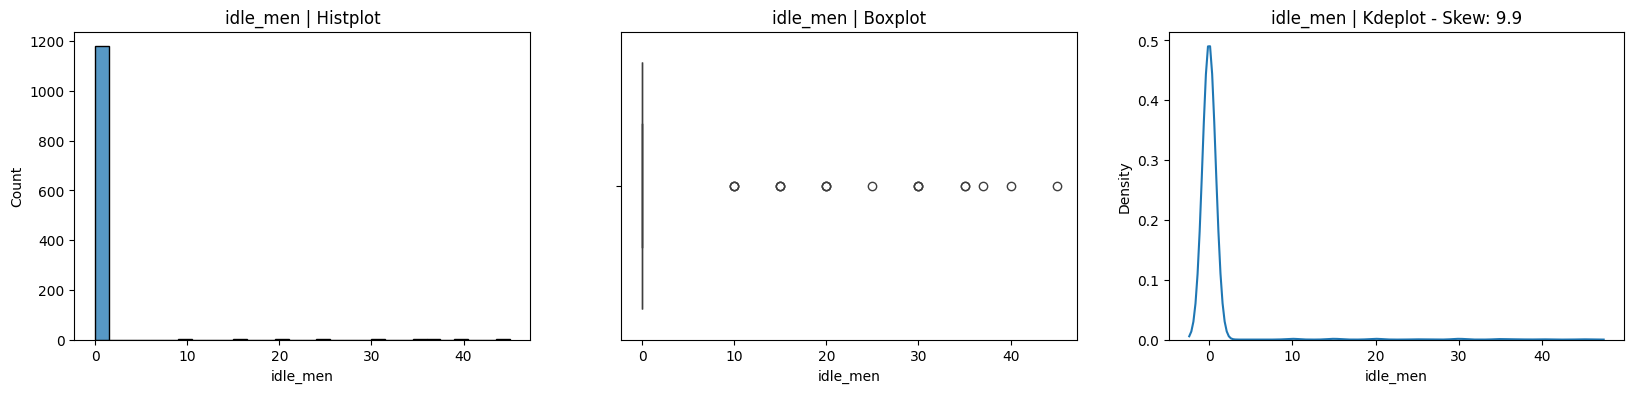

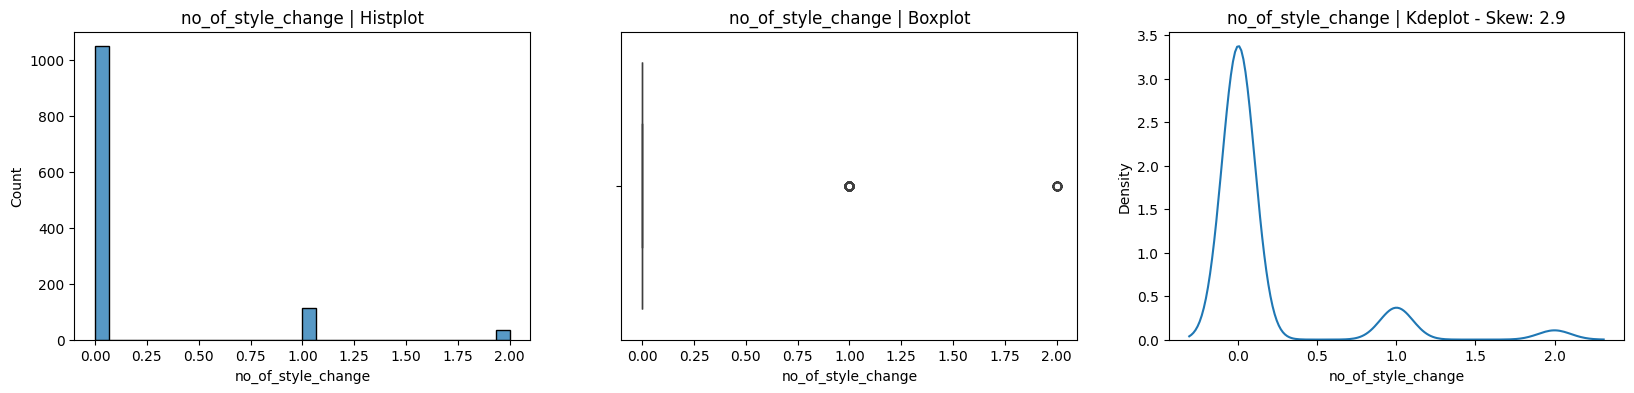

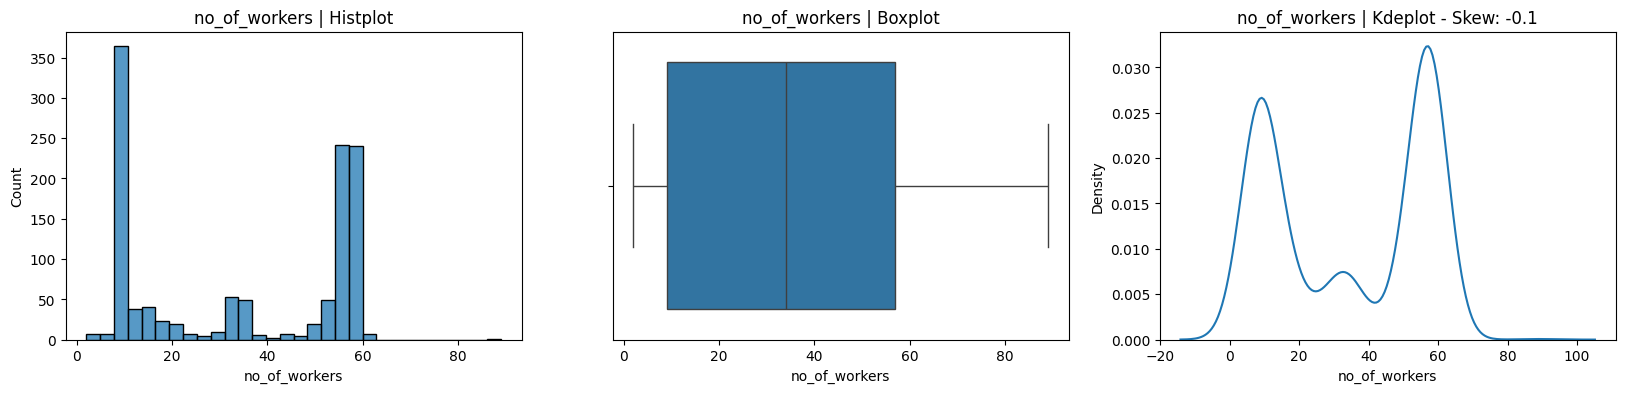

In [16]:
#memisahkan fitur target, kolom kategorikal, dan kolom numerik
target = ['actual_productivity']
cat_cols = ['date', 'quarter', 'department', 'day']
num_cols = [i for i in df_copy.columns if i not in (target + cat_cols)]
for i in df_copy[num_cols].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df_copy[i],ax=ax[0], bins=30)
    sns.boxplot(x=df_copy[i], ax=ax[1])
    sns.kdeplot(df_copy[i], ax=ax[2])
    skew_val=round(df_copy[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

In [17]:
# Fungsi untuk menghitung persentase outlier
def hitung_persentase_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    jumlah_outlier = ((data < batas_bawah) | (data > batas_atas)).sum()
    persentase_outlier = jumlah_outlier / len(data) * 100
    return persentase_outlier

# Menghitung persentase outlier pada setiap kolom numerik
persentase_outlier = df_copy[num_cols].apply(hitung_persentase_outlier)

print(persentase_outlier)

team                      0.000000
targeted_productivity     6.599833
smv                       0.000000
wip                      13.617377
over_time                 0.083542
incentive                 0.918964
idle_time                 1.503759
idle_men                  1.503759
no_of_style_change       12.280702
no_of_workers             0.000000
dtype: float64


 *targeted_productivity memiliki outlier sebesar 6.6 %, wip memiliki outlier sebesar 14 %, over_time memiliki outlier sebesar 0.08 %, incentive memiliki outlier sebesar 0.9 %, idle_time memiliki outlier sebesar 1.5 %, idle_men memiliki outlier sebesar 1.5 % dan no_of_style_change memiliki outlier sebesar 12 %

##Handling Outlier

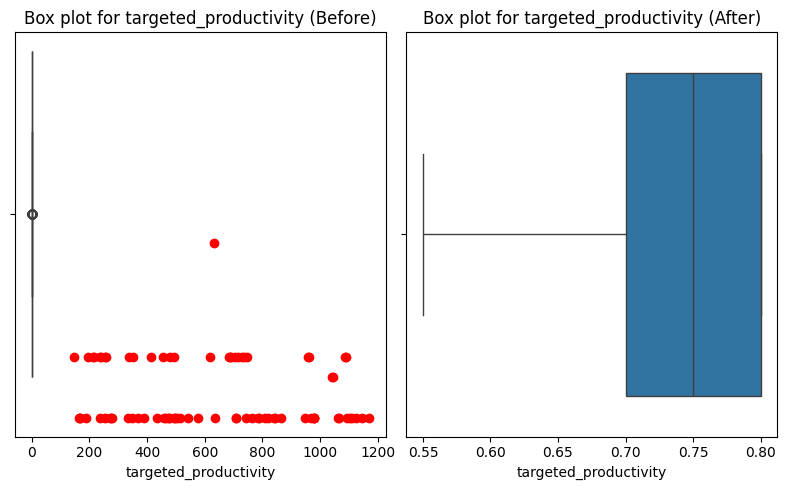

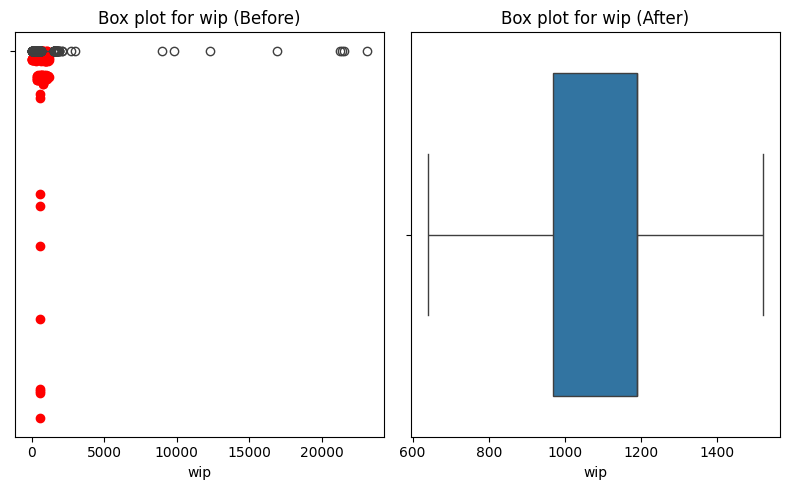

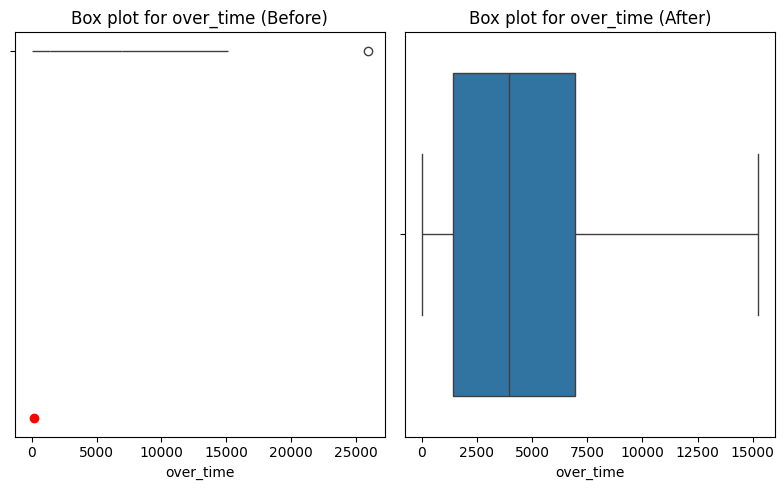

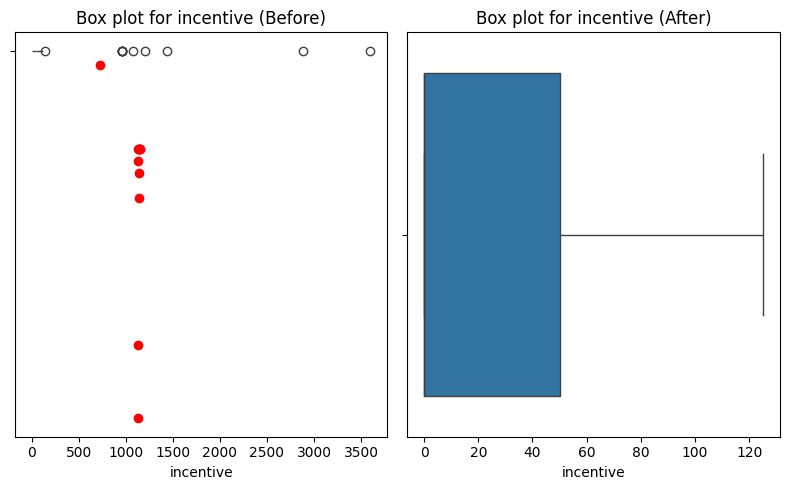

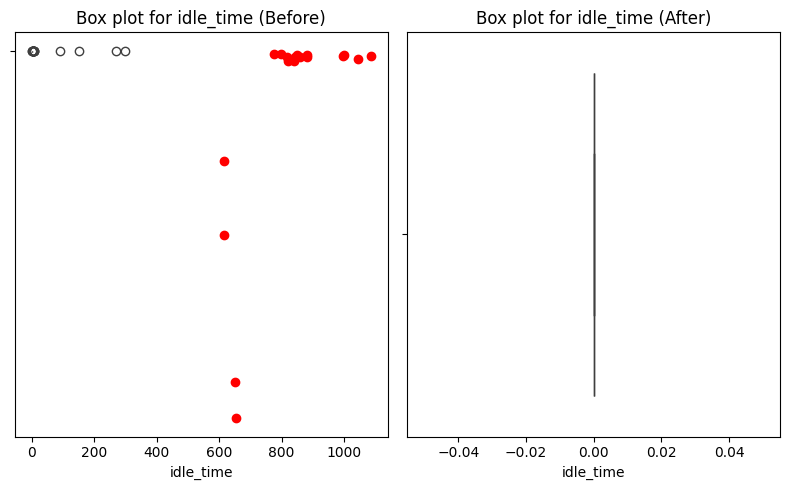

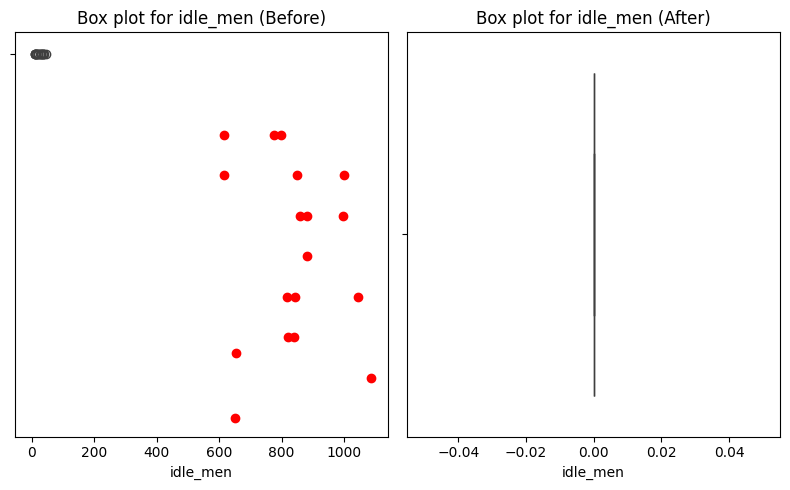

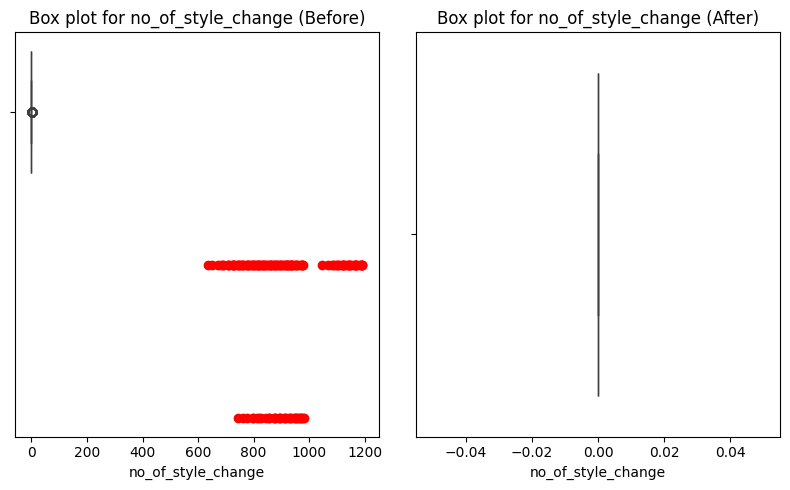

In [18]:
outlier_cols = ['targeted_productivity', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change']

# Menggunakan Interquartile Range (IQR) untuk mendeteksi outlier
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Menghapus outlier menggunakan IQR
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Membuat visualisasi box plot satu per satu
for col in outlier_cols:
    plt.figure(figsize=(8, 5))

    # Visualisasi box plot sebelum handling outlier
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_copy[col])
    plt.title(f'Box plot for {col} (Before)')

    # Mendeteksi dan menampilkan outlier
    outliers = detect_outliers_iqr(df_copy, col)
    if not outliers.empty:
        plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')

    # Handling outlier menggunakan IQR
    df_copy = remove_outliers_iqr(df_copy, col)

    # Visualisasi box plot setelah handling outlier
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_copy[col])
    plt.title(f'Box plot for {col} (After)')

    plt.tight_layout()
    plt.show()

## Imbalance case pada variabel Target

In [19]:
target_column = 'actual_productivity'
df_copy[target_column] = df_copy[target_column].apply(lambda x: 1 if x > 0.5 else 0)


Rasio ketidakseimbangan: 0.12
Ada ketidakseimbangan kelas. Rasio lebih kecil dari 0.5 menunjukkan ketidakseimbangan yang signifikan.

Distribusi kelas sebelum Random Over Sampler: {0: 133, 1: 1064}

Proporsi setiap kelas:
actual_productivity
1    0.888889
0    0.111111
Name: count, dtype: float64

Distribusi kelas setelah Random Over Sampler: {0: 1064, 1: 1064}


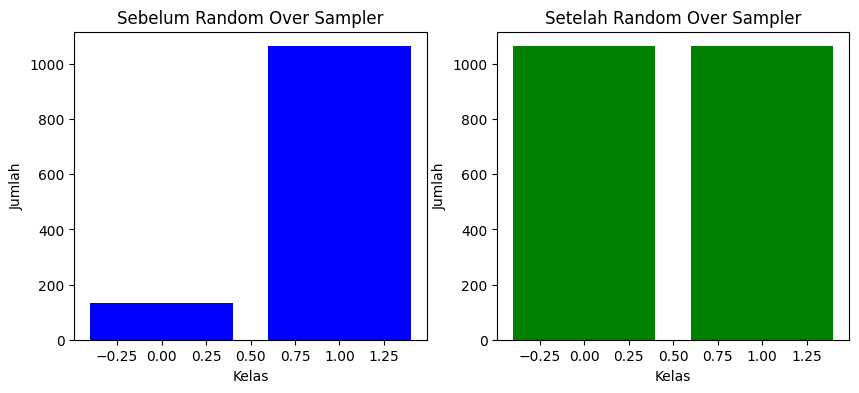

In [20]:
# Hitung frekuensi setiap kelas dalam variabel target
frekuensi_kelas = df_copy['actual_productivity'].value_counts()

# Analisis ketidakseimbangan kelas
if len(frekuensi_kelas) > 1:
    rasio_ketidakseimbangan = frekuensi_kelas.min() / frekuensi_kelas.max()
    print('\nRasio ketidakseimbangan: {:.2f}'.format(rasio_ketidakseimbangan))
    if rasio_ketidakseimbangan < 0.5:
        print('Ada ketidakseimbangan kelas. Rasio lebih kecil dari 0.5 menunjukkan ketidakseimbangan yang signifikan.')
    else:
        print('Tidak ada ketidakseimbangan kelas.')
else:
    print('Hanya ada satu kelas dalam variabel target.')

# Ganti X dengan DataFrame fitur Anda yang sebenarnya dan y dengan Seri target
X = df_copy.loc[:, ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']]
y = df_copy.actual_productivity

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit dan transform data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Distribusi kelas sebelum Random Over Sampler
unik, jumlah = np.unique(y, return_counts=True)
print("\nDistribusi kelas sebelum Random Over Sampler:", dict(zip(unik, jumlah)))

# Hitung proporsi setiap kelas terhadap total sampel
proporsi_kelas = frekuensi_kelas / frekuensi_kelas.sum()
print("\nProporsi setiap kelas:")
print(proporsi_kelas)

# Distribusi kelas setelah Random Over Sampler
unik_resampled, jumlah_resampled = np.unique(y_resampled, return_counts=True)
print("\nDistribusi kelas setelah Random Over Sampler:", dict(zip(unik_resampled, jumlah_resampled)))

# Visualisasikan distribusi kelas sebelum dan sesudah Random Over Sampler
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(unik, jumlah, color='blue')
plt.title('Sebelum Random Over Sampler')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.subplot(1, 2, 2)
plt.bar(unik_resampled, jumlah_resampled, color='green')
plt.title('Setelah Random Over Sampler')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

## Encoding Data

In [21]:
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['department'] = df_copy['department'].replace('finishing ', 'finishing')
df_copy2 = df_copy.copy()

In [22]:
print(f'Quarter Unique : {df_copy2.quarter.unique()}')
print(f'Department Unique : {df_copy2.department.unique()}')
print(f'Day Unique : {df_copy2.day.unique()}')
print(f'Idle Time Unique : {df_copy2.idle_time.unique()}')
print(f'Idle Time Unique : {df_copy2.idle_men.unique()}')
print(f'No of style change Unique : {df_copy2.no_of_style_change.unique()}')

Quarter Unique : ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Department Unique : ['sweing' 'finishing']
Day Unique : ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Idle Time Unique : [0.]
Idle Time Unique : [0.]
No of style change Unique : [0.]


In [23]:
department_mapping = {'sweing': 0, 'finishing' : 1}
df_copy2['department'] = df_copy2['department'].map(department_mapping)

quarter_mapping = {'Quarter1': 0, 'Quarter2': 1, 'Quarter3': 2, 'Quarter4': 3, 'Quarter5': 4}
df_copy2['quarter'] = df_copy2['quarter'].map(quarter_mapping)

day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Saturday': 4, 'Sunday': 5}
df_copy2['day'] = df_copy2['day'].map(day_mapping)

<Axes: >

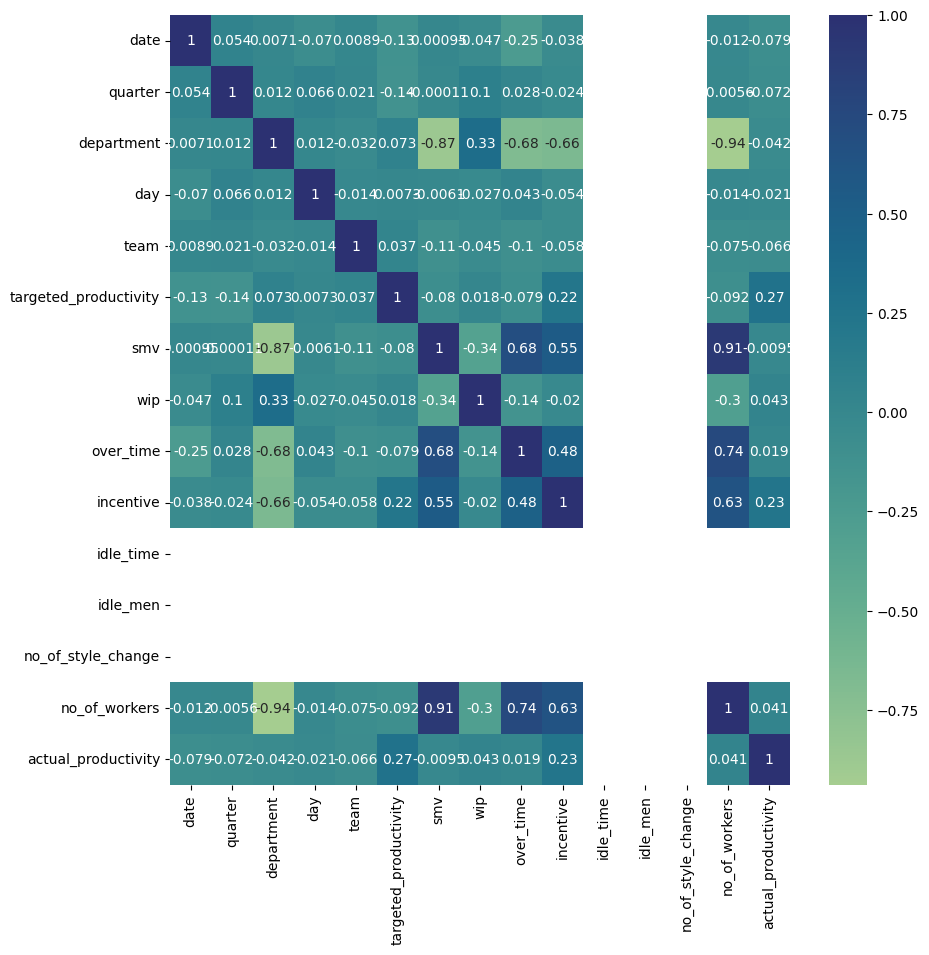

In [24]:
# @title Cek Korelasi Data

#menampilkan korelasi dengan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_copy2.corr() , annot =True,cmap='crest')

# Exploratory Data Analysis

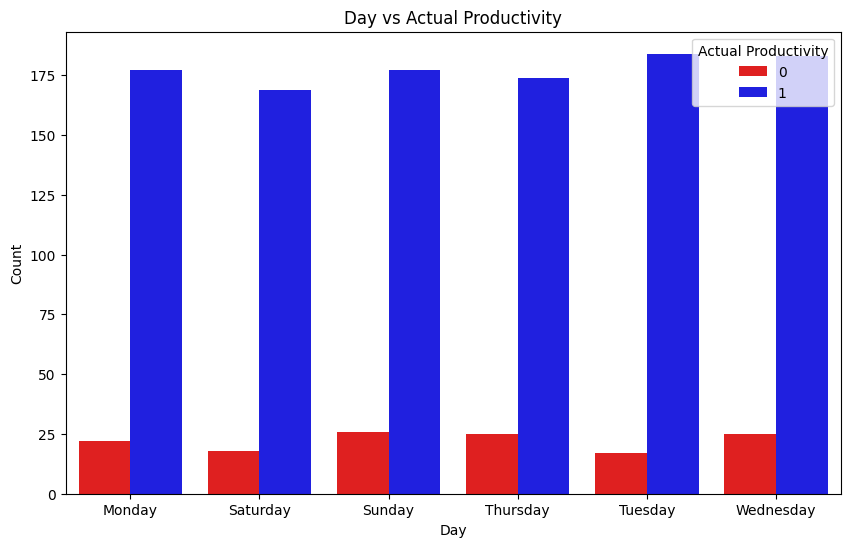

In [25]:
# @title Day vs Actual_productivity

# Menghitung jumlah kemunculan setiap nilai 'actual_productivity' per 'day'
count_data = df_copy.groupby(['day', 'actual_productivity']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='count', hue='actual_productivity', data=count_data, palette={0: 'red', 1: 'blue'})

# Menyesuaikan plot agar sesuai dengan gaya
plt.title('Day vs Actual Productivity')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Actual Productivity', loc='upper right')
plt.show()

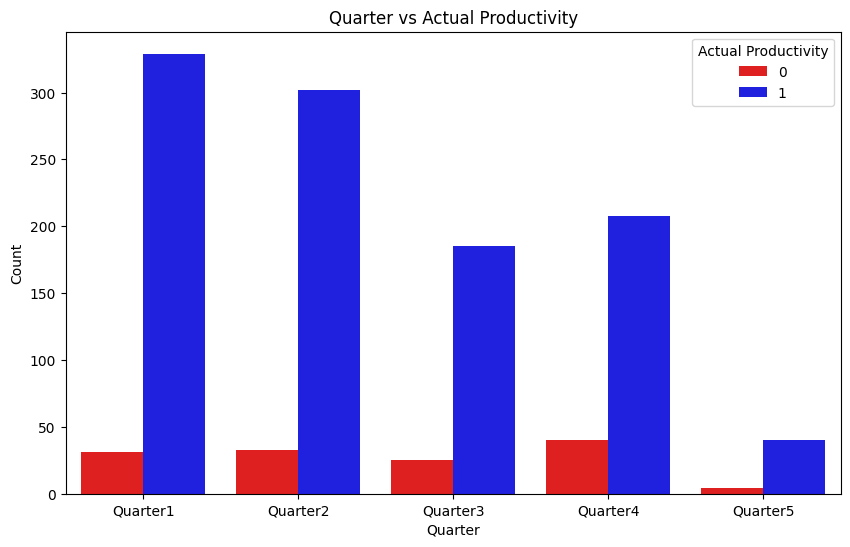

In [26]:
# @title Quarter vs Actual_productivity

# Menghitung jumlah kemunculan setiap nilai 'actual_productivity' per 'quarter'
count_data = df_copy.groupby(['quarter', 'actual_productivity']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='count', hue='actual_productivity', data=count_data, palette={0: 'red', 1: 'blue'})

# Menyesuaikan plot agar sesuai dengan gaya
plt.title('Quarter vs Actual Productivity')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend(title='Actual Productivity', loc='upper right')
plt.show()

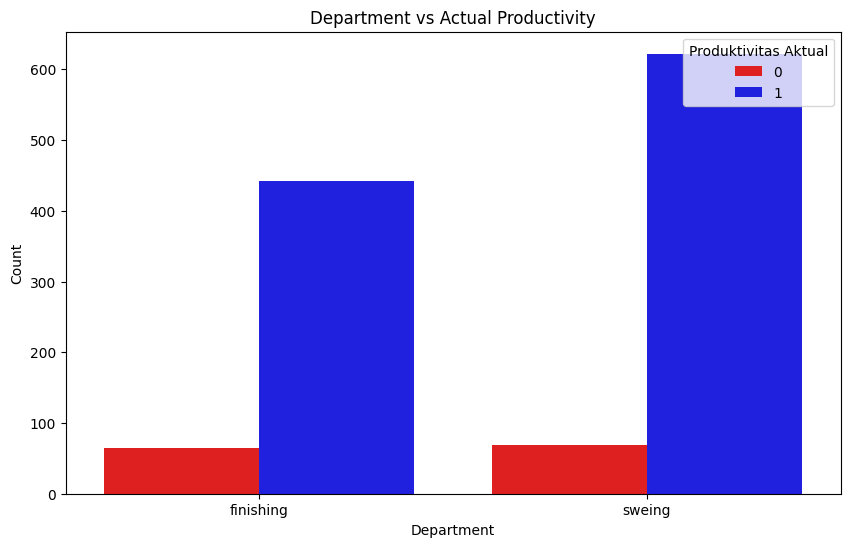

In [27]:
# @title Department vs Actual_productivity

# Menghitung jumlah kemunculan setiap nilai 'actual_productivity' per 'department'
count_data = df_copy.groupby(['department', 'actual_productivity']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='count', hue='actual_productivity', data=count_data, palette={0: 'red', 1: 'blue'})

# Menyesuaikan plot agar sesuai dengan gaya
plt.title('Department vs Actual Productivity')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Produktivitas Aktual', loc='upper right')
plt.show()

In [28]:
# @title No_of_workers vs Actual_productivity

# Membuat bubble chart dengan plotly
fig = px.scatter(df_copy, x='no_of_workers', y='actual_productivity',
                 size='no_of_workers', color='no_of_workers',
                 hover_name='no_of_workers', size_max=60)

fig.update_layout(title='No. of Workers vs Actual Productivity',
                  xaxis_title='No. of Workers',
                  yaxis_title='Actual Productivity')

fig.show()

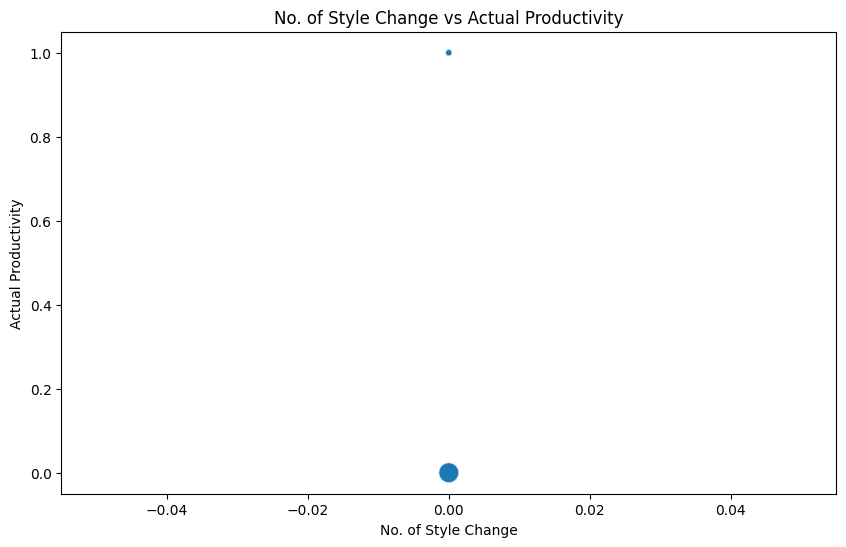

In [29]:
# @title No_of_style_change vs Actual_productivity

plt.figure(figsize=(10, 6))
sns.scatterplot(x='no_of_style_change', y='actual_productivity', size='actual_productivity', data=df_copy, sizes=(20, 200), legend=False)
plt.title('No. of Style Change vs Actual Productivity')
plt.xlabel('No. of Style Change')
plt.ylabel('Actual Productivity')
plt.show()

In [30]:
# @title Targeted_productivity vs Actual_productivity

# Membuat bubble chart dengan plotly
fig = px.scatter(df_copy, x='targeted_productivity', y='actual_productivity',
                 size='targeted_productivity', color='targeted_productivity',
                 hover_name='targeted_productivity', size_max=60)

fig.update_layout(title='Targeted Productivity vs Actual Productivity',
                  xaxis_title='Targeted Productivity',
                  yaxis_title='Actual Productivity')

fig.show()

In [31]:
# @title Smv vs Actual_productivity

# Membuat bubble chart dengan plotly
fig = px.scatter(df_copy, x='smv', y='actual_productivity',
                 size='smv', color='smv',
                 hover_name='smv', size_max=60)

fig.update_layout(title='SMV vs Actual Productivity',
                  xaxis_title='SMV',
                  yaxis_title='Actual Productivity')

fig.show()

In [32]:
# @title Wip vs Actual_productivity

# Membuat bubble chart dengan plotly
fig = px.scatter(df_copy, x='wip', y='actual_productivity',
                 size='wip', color='wip',
                 hover_name='wip', size_max=60)

fig.update_layout(title='WIP vs Actual Productivity',
                  xaxis_title='WIP',
                  yaxis_title='Actual Productivity')

fig.show()

In [33]:
# @title Over_time vs Actual_productivity

# Membuat bubble chart dengan plotly
fig = px.scatter(df_copy, x='over_time', y='actual_productivity',
                 size='over_time', color='over_time',
                 hover_name='over_time', size_max=60)

fig.update_layout(title='Over Time vs Actual Productivity',
                  xaxis_title='Over Time vs Actual Productivity',
                  yaxis_title='Actual Productivity')

fig.show()

In [34]:
# @title Incentive vs Actual_productivity

# Membuat bubble chart dengan plotly
fig = px.scatter(df_copy, x='incentive', y='actual_productivity',
                 size='incentive', color='incentive',
                 hover_name='incentive', size_max=60)

fig.update_layout(title='Incentive vs Actual Productivity',
                  xaxis_title='Incentive',
                  yaxis_title='Actual Productivity')

fig.show()

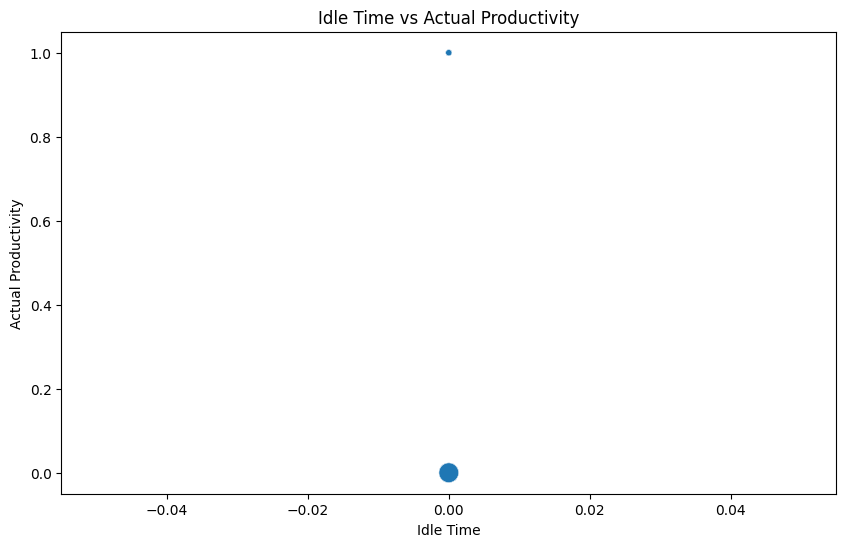

In [35]:
# @title Idle_time vs Actual_productivity

plt.figure(figsize=(10, 6))
sns.scatterplot(x='idle_time', y='actual_productivity', size='actual_productivity', data=df_copy, sizes=(20, 200), legend=False)
plt.title('Idle Time vs Actual Productivity')
plt.xlabel('Idle Time')
plt.ylabel('Actual Productivity')
plt.show()

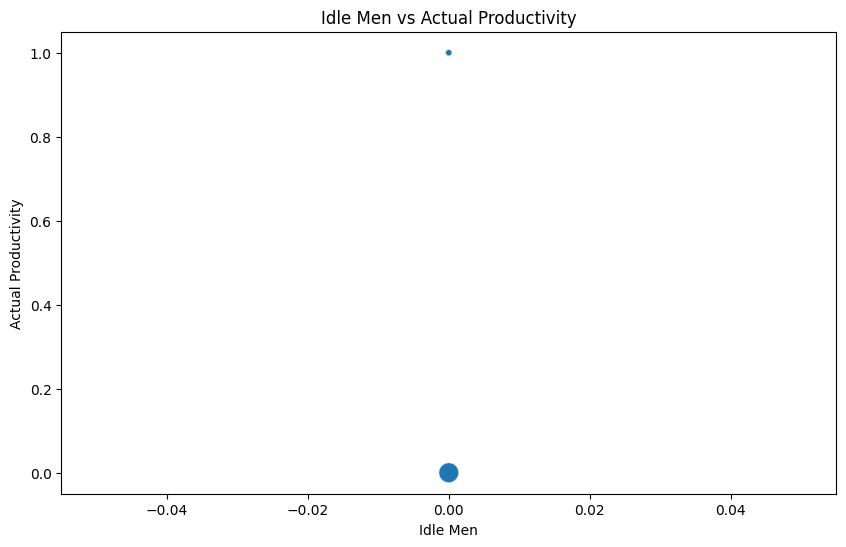

In [36]:
# @title Idle_men vs Actual_productivity

plt.figure(figsize=(10, 6))
sns.scatterplot(x='idle_men', y='actual_productivity', size='actual_productivity', data=df_copy, sizes=(20, 200), legend=False)
plt.title('Idle Men vs Actual Productivity')
plt.xlabel('Idle Men')
plt.ylabel('Actual Productivity')
plt.show()

#Modeling

##Split Data

In [37]:
X = df_copy.loc[:, ['team', 'targeted_productivity','smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']]
y = df_copy.actual_productivity

* saya melakukan split data feature dan target. target pada variable y dan feature terdiri dari variable team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change dan no_of_workers.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

## Define Model

In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVM RBF': SVR(),
    'MLP': MLPRegressor(random_state=42)
}

## Akurasi untuk setiap model

In [40]:
accuracy = {}
# Menghitung akurasi untuk setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    accuracy[name] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

accuracy_df = pd.DataFrame(accuracy).T
print(accuracy_df)

                   Train Accuracy  Test Accuracy
Linear Regression        0.135714       0.065528
KNN                      0.305319       0.023474
Decision Tree            0.888959      -0.118936
Random Forest            0.812764       0.141418
SVM RBF                 -0.000874      -0.001499
MLP                    -14.749516     -24.536738


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## Cross-Validation dan Hyperparameter Tuning

In [41]:
cross_validation_hyperparameter_tuning = {}
# Tentukan setiap model dengan hyperparameter grid yang ingin diuji
param_grid = {
    'Linear Regression': {},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM RBF': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
}

# Lakukan cross-validation dan hyperparameter tuning untuk setiap model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    cross_validation_hyperparameter_tuning[name] = {'Best parameters': grid_search.best_params_,
                                                        'Best cross-validation score': grid_search.best_score_,
                                                        'Test score': grid_search.score(X_test, y_test)}
cross_validation_hyperparameter_tuning_df = pd.DataFrame(cross_validation_hyperparameter_tuning).T
print(cross_validation_hyperparameter_tuning_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

                                                  Best parameters  \
Linear Regression                                              {}   
KNN                                            {'n_neighbors': 7}   
Decision Tree                                    {'max_depth': 5}   
Random Forest                               {'n_estimators': 200}   
SVM RBF                                    {'C': 0.1, 'gamma': 1}   
MLP                {'alpha': 0.001, 'hidden_layer_sizes': (100,)}   

                  Best cross-validation score Test score  
Linear Regression                    0.110574   0.065528  
KNN                                 -0.064775   0.058052  
Decision Tree                        0.040316   0.028902  
Random Forest                        0.126136    0.15796  
SVM RBF                              0.012043   0.044289  
MLP                                -17.927349  -9.695683  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# Evaluasi Model

In [42]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Inisialisasi dictionary untuk menyimpan hasil RMSE dan SMAPE untuk setiap model
results = {}

# Lakukan perulangan melalui setiap model
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)  # pastikan Anda sudah memiliki X_train dan y_train yang sesuai
    # Lakukan prediksi
    y_pred = model.predict(X_test)  # pastikan Anda sudah memiliki X_test yang sesuai
    # Hitung MSE
    mse = mean_squared_error(y_test, y_pred)
    # Hitung RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Hitung MAE
    mae = mean_absolute_error(y_test, y_pred)
    # Hitung R2
    r2 = r2_score(y_test, y_pred)
    # Hitung SMAPE
    smape_val = smape(y_test, y_pred)
    # Tambahkan hasil ke dalam dictionary
    results[model_name] = {'MSE': mse,'RMSE': rmse, 'MAE': mae, 'R²':r2, 'SMAPE': smape_val }

# Konversi dictionary menjadi DataFrame
results_df = pd.DataFrame(results).T

print(results_df)


                        MSE      RMSE       MAE         R²      SMAPE
Linear Regression  0.093301  0.305452  0.200108   0.065528  34.635751
KNN                0.097500  0.312250  0.159167   0.023474  31.550110
Decision Tree      0.111719  0.334244  0.121458  -0.118936  25.061214
Random Forest      0.085724  0.292787  0.144064   0.141418  31.886984
SVM RBF            0.099993  0.316217  0.189873  -0.001499  31.826828
MLP                2.549684  1.596773  0.864491 -24.536738  84.953571


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# Rekomendasi Model

In [43]:
# Gabungkan kedua DataFrame
combined_results = pd.concat([cross_validation_hyperparameter_tuning_df, results_df], axis=1)

# Menyortir model berdasarkan RMSE dan SMAPE
results_df = combined_results.sort_values(by=['RMSE', 'SMAPE'])

print("Model terbaik :")
print(results_df.head(1))

Model terbaik :
                     Best parameters Best cross-validation score Test score  \
Random Forest  {'n_estimators': 200}                    0.126136    0.15796   

                    MSE      RMSE       MAE        R²      SMAPE  
Random Forest  0.085724  0.292787  0.144064  0.141418  31.886984  
